# **Sample Real-time Insights Generation Use cases for 360 Insights Survey**

> Visualization of core competencies with Radar Chart given dataset

> Sentiment Analysis

> Automated Report/Reminder Generation










In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

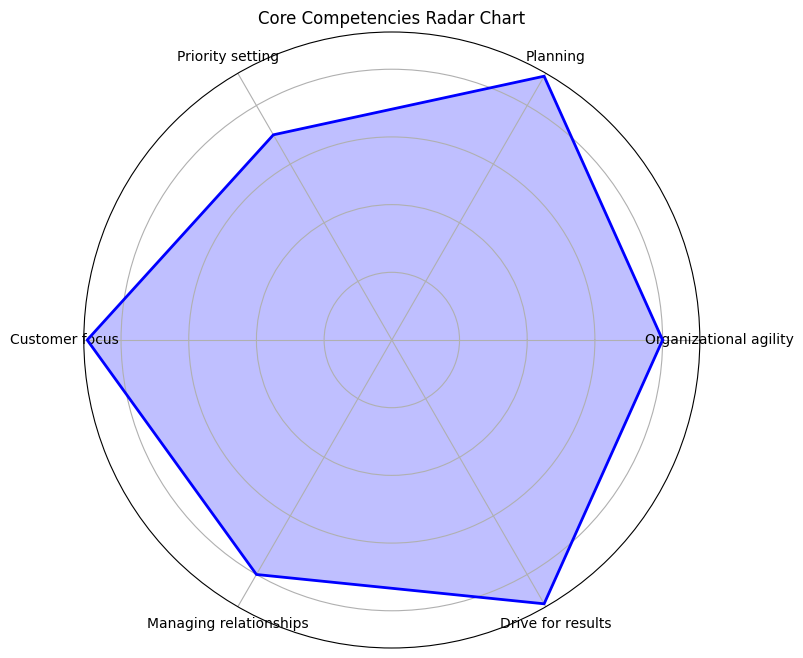

In [ ]:
# Visualization

# sample data: core competencies and their scores based on survey responses

competencies = ['Organizational agility', 'Planning', 'Priority setting', 'Customer focus', 'Managing relationships', 'Drive for results']
scores = [8, 9, 7, 9, 8, 9]  # Sample scores for each competency

# Number of competencies
num_competencies = len(competencies)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_competencies, endpoint=False).tolist()
scores += scores[:1]  # Ensure the first and last points are the same for closed loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, scores, color='blue', alpha=0.25)
ax.plot(angles, scores, color='blue', linewidth=2, linestyle='solid')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(competencies)
ax.set_title('Core Competencies Radar Chart')

plt.show()

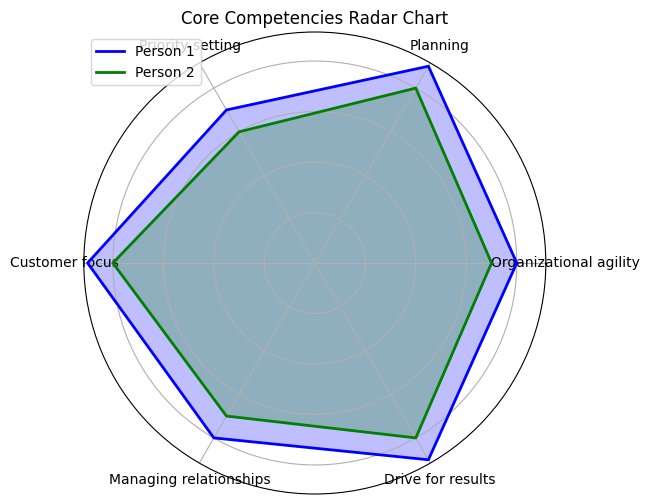

In [ ]:
# core competencies comparison between 2 individuals


# Sample data for two individuals
competencies = ['Organizational agility', 'Planning', 'Priority setting', 'Customer focus', 'Managing relationships', 'Drive for results']
scores_person1 = [8, 9, 7, 9, 8, 9]  # Sample scores for person 1
scores_person2 = [7, 8, 6, 8, 7, 8]  # Sample scores for person 2

# Number of competencies
num_competencies = len(competencies)

# Create a radar chart for person 1
angles = np.linspace(0, 2 * np.pi, num_competencies, endpoint=False).tolist()
scores_person1 += scores_person1[:1]  # Ensure the first and last points are the same for closed loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(polar=True))
ax.fill(angles, scores_person1, color='blue', alpha=0.25)
ax.plot(angles, scores_person1, color='blue', linewidth=2, linestyle='solid', label='Person 1')

# Create a radar chart for person 2
angles = np.linspace(0, 2 * np.pi, num_competencies, endpoint=False).tolist()
scores_person2 += scores_person2[:1]  # Ensure the first and last points are the same for closed loop
angles += angles[:1]

ax.fill(angles, scores_person2, color='green', alpha=0.25)
ax.plot(angles, scores_person2, color='green', linewidth=2, linestyle='solid', label='Person 2')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(competencies)
ax.set_title('Core Competencies Radar Chart')
ax.legend()

plt.show()


# **Sentiment Analysis**

Learn more: https://realpython.com/python-nltk-sentiment-analysis/


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Using Python's Natural Language Toolkit for sentiment analysis
# Sentiment analysis is the practice of using algorithms to classify various samples of related text into overall positive and negative categories.
# With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample consumer responses from the survey
survey_responses = [
    "The product is fantastic! I love it.",
    "The customer service was terrible. I'm very disappointed.",
    "I had a mixed experience with the product. Some aspects were good, while others could be improved.",
    "I'm satisfied with the quality of the service provided.",
    "The price is too high for the value offered."
]

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each response
sentiments = []
for response in survey_responses:
    sentiment_score = sia.polarity_scores(response)
    sentiments.append(sentiment_score)

# Print sentiment scores for each response
for i, response in enumerate(survey_responses):
    print("Response:", response)
    print("Sentiment Score:", sentiments[i])
    print()

# Aggregate sentiment scores
compound_scores = [sentiment['compound'] for sentiment in sentiments]
average_score = sum(compound_scores) / len(compound_scores)
print("Average Sentiment Score:", average_score)



Response: The product is fantastic! I love it.
Sentiment Score: {'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'compound': 0.8439}

Response: The customer service was terrible. I'm very disappointed.
Sentiment Score: {'neg': 0.52, 'neu': 0.48, 'pos': 0.0, 'compound': -0.7574}

Response: I had a mixed experience with the product. Some aspects were good, while others could be improved.
Sentiment Score: {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.7184}

Response: I'm satisfied with the quality of the service provided.
Sentiment Score: {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.4215}

Response: The price is too high for the value offered.
Sentiment Score: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}

Average Sentiment Score: 0.31328


Let's try to visualize the sentiment of the respondents (in this case customer) to uncover more patterns for prediction

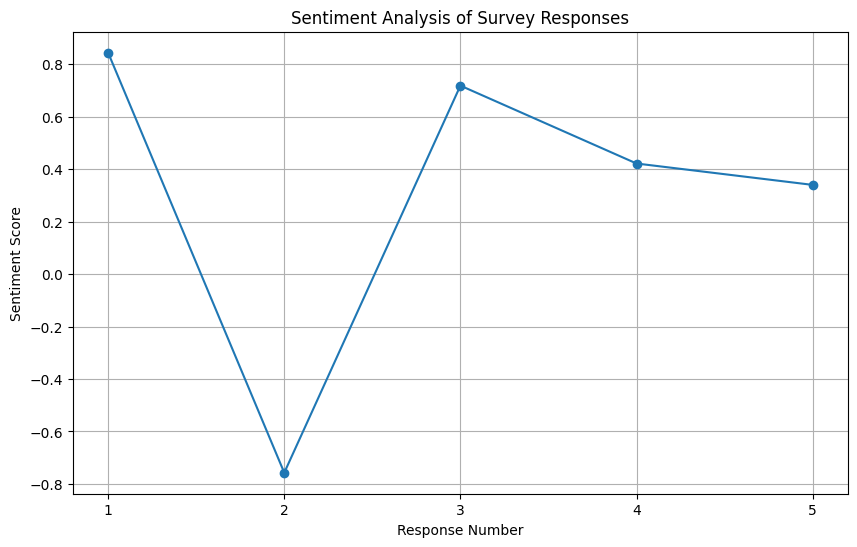

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Sample consumer responses from the survey
survey_responses = [
    "The product is fantastic! I love it.",
    "The customer service was terrible. I'm very disappointed.",
    "I had a mixed experience with the product. Some aspects were good, while others could be improved.",
    "I'm satisfied with the quality of the service provided.",
    "The price is too high for the value offered."
]

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each response
sentiments = []
for response in survey_responses:
    sentiment_score = sia.polarity_scores(response)
    sentiments.append(sentiment_score['compound'])

# Visualize sentiment scores as a line chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sentiments) + 1), sentiments, marker='o', linestyle='-')
plt.title('Sentiment Analysis of Survey Responses')
plt.xlabel('Response Number')
plt.ylabel('Sentiment Score')
plt.xticks(range(1, len(sentiments) + 1))
plt.grid(True)
plt.show()

Let's try to use this information to predict whether consumers will decide to buy or not buy a certain product!

In [ ]:
# Set threshold for classification
threshold = 0.1

# Classify responses based on sentiment scores
buy_sentiments = [1 if score > threshold else 0 for score in sentiments]

# Calculate percentage of positive responses (tendency to buy)
buy_percentage = sum(buy_sentiments) / len(buy_sentiments) * 100
print("Percentage of positive responses (tendency to buy): {:.2f}%".format(buy_percentage))


Percentage of positive responses (tendency to buy): 80.00%


### **Let's apply this to Employees responding to survey. We will use their inputs to sugges the job positions based on their sentiment analysis**


To suggest job positions based on sentiment analysis of employee survey responses, we need to map the sentiment scores to relevant job positions or roles. We can do this by associating certain sentiment patterns with specific job requirements, responsibilities, or cultural fit. Here's an example approach:

**Define Job Position Criteria:** Identify key traits, skills, and attitudes required for different job positions within your organization. For example, a customer service representative might require strong communication and problem-solving skills, while a software developer might require proficiency in coding languages.

**Analyze Sentiment Patterns:** Analyze sentiment patterns in the survey responses to identify characteristics or attitudes that align with the criteria for each job position. For example, positive sentiment related to communication skills and customer interactions might suggest a good fit for customer-facing roles.

**Assign Job Positions:** Based on the sentiment analysis results, suggest job positions that align with the identified characteristics and attitudes expressed in the survey responses. This could involve matching sentiment patterns to predefined job position profiles or using machine learning algorithms to cluster respondents into similar groups and suggest appropriate job positions for each group.

**Provide Recommendations:** Present the suggested job positions to the respondents along with explanations of why these positions are suitable based on their sentiment analysis results. This could help employees explore potential career paths or development opportunities within the organization.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample employee survey responses
employee_responses = [
    "I enjoy helping customers and solving their problems.",
    "I love coding and developing new software.",
    "I'm good at negotiating and closing deals.",
    "I find satisfaction in troubleshooting technical issues.",
    "I excel at communicating complex ideas to clients."
]

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each response
sentiments = []
for response in employee_responses:
    sentiment_score = sia.polarity_scores(response)
    sentiments.append(sentiment_score)

# Define job positions and their criteria
job_positions = {
    'customer_service_representative': ['helping customers', 'solving problems', 'communication'],
    'software_developer': ['coding', 'developing software'],
    'sales_associate': ['negotiating', 'closing deals']
}

# Function to suggest job positions based on sentiment analysis results
def suggest_job_positions(sentiments, job_positions, threshold=0.5):
    suggested_positions = {}
    for i, sentiment in enumerate(sentiments):
        suggested_positions[i] = []
        print(f"Sentiment scores for Employee {i+1}: {sentiment}")
        for position, criteria in job_positions.items():
            if any(sentiment.get(criterion, 0) >= threshold for criterion in criteria):
                suggested_positions[i].append(position)
    return suggested_positions

# Suggest job positions for employees
suggested_positions = suggest_job_positions(sentiments, job_positions)

# Print employee responses and suggested job positions
print("Employee Survey Responses and Suggested Job Positions:")
for i, response in enumerate(employee_responses):
    print(f"Employee {i+1} Response: {response}")
    if suggested_positions[i]:
      print(f"Suggested Job Position(s): {', '.join(suggested_positions[i])}")
    else:
        print("No suggested job position based on sentiment analysis.")
    print()

Sentiment scores for Employee 1: {'neg': 0.2, 'neu': 0.222, 'pos': 0.578, 'compound': 0.6249}
Sentiment scores for Employee 2: {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
Sentiment scores for Employee 3: {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
Sentiment scores for Employee 4: {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.5574}
Sentiment scores for Employee 5: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
Employee Survey Responses and Suggested Job Positions:
Employee 1 Response: I enjoy helping customers and solving their problems.
No suggested job position based on sentiment analysis.

Employee 2 Response: I love coding and developing new software.
No suggested job position based on sentiment analysis.

Employee 3 Response: I'm good at negotiating and closing deals.
No suggested job position based on sentiment analysis.

Employee 4 Response: I find satisfaction in troubleshooting technical issues.
No suggested job position 

In this code:

**Importing Libraries:**

import nltk: This imports the Natural Language Toolkit (NLTK) library, which provides various tools for natural language processing tasks.

from nltk.sentiment import SentimentIntensityAnalyzer: This imports the SentimentIntensityAnalyzer class from NLTK's sentiment analysis module.
Sample Employee Survey Responses:

employee_responses: This is a list containing sample responses from an employee survey. Each response represents feedback or opinions provided by an employee.

**Initializing Sentiment Intensity Analyzer:**

sia = SentimentIntensityAnalyzer(): This initializes a sentiment intensity analyzer object, which will be used to analyze the sentiment of the survey responses.

**Performing Sentiment Analysis:**

The code iterates through each response in the employee_responses list.
For each response, it calculates the sentiment scores using the polarity_scores() method of the SentimentIntensityAnalyzer class.
The sentiment scores include the negative, neutral, positive, and compound scores for the response. These scores quantify the sentiment expressed in the text.

**Defining Job Positions and Criteria:**

job_positions: This dictionary defines different job positions as keys and lists of criteria associated with each position as values. The criteria represent skills or attributes required for each job position.
Suggesting Job Positions Based on Sentiment Analysis:

suggest_job_positions(): This function takes sentiment analysis results (sentiments), job positions (job_positions), and an optional threshold parameter as input.

It iterates through each sentiment analysis result (for each employee response) and checks if any of the sentiment scores for the response meet the threshold for each criterion associated with each job position.
If any sentiment score for a criterion meets the threshold, the corresponding job position is suggested for the employee.

The function returns a dictionary (suggested_positions) where keys are indices of employee responses, and values are lists of suggested job positions based on sentiment analysis.

**Printing Employee Responses and Suggested Job Positions:**

The code prints the sentiment scores for each employee response.
It then iterates through each employee response and prints the response itself.

If there are suggested job positions based on sentiment analysis, it prints those positions. Otherwise, it prints that no job position was suggested based on sentiment analysis.

# **Automated report and reminder generator**

To automate personalized reports for employees after they fill in the survey and construct reminders for them to fill in the survey at a specified time, we can utilize Python along with scheduling libraries like **schedule** for reminders and email libraries such as **smtplib** for sending personalized reports via email.


In [ ]:
!pip install schedule

In [ ]:
import schedule
import time
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Sample employee survey responses (replace with actual responses)
employee_responses = {
    "Employee1": "I enjoy helping customers and solving their problems.",
    "Employee2": "I love coding and developing new software.",
    "Employee3": "I'm good at negotiating and closing deals.",
    "Employee4": "I find satisfaction in troubleshooting technical issues.",
    "Employee5": "I excel at communicating complex ideas to clients."
}

# Function to analyze survey responses and generate personalized reports
def generate_reports():
    # Initialize Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()

    # Process each employee response and generate personalized reports
    for employee, response in employee_responses.items():
        sentiment_score = sia.polarity_scores(response)
        # Construct personalized report based on sentiment analysis
        report = f"Dear {employee},\n\nThank you for completing the survey.\n\nHere is a summary of your response:\n\n{response}\n\nSentiment Analysis Scores:\n{sentiment_score}\n\nBest regards,\n[Your Company]"
        # Email the personalized report
        send_email(employee, report)
        print(f"Generated report for {employee}")

# Function to send email reminders to employees to fill in the survey
def send_reminders():
    # Construct reminder message
    reminder_message = "Dear Employee,\n\nThis is a friendly reminder to fill in the survey.\n\nBest regards,\n[Your Company]"
    # Send reminder email to each employee
    for employee in employee_responses.keys():
        send_email(employee, reminder_message)
        print(f"Sent reminder to {employee}")

# Function to send email
def send_email(recipient, message):
    # Sender's email credentials (replace with actual credentials)
    sender_email = "your_email@gmail.com"
    sender_password = "your_password"

    # Email setup
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient
    msg['Subject'] = "Employee Survey Report"  # Subject of the email

    # Attach message to email
    msg.attach(MIMEText(message, 'plain'))

    # Create SMTP session
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        text = msg.as_string()
        # Send email
        server.sendmail(sender_email, recipient, text)



In [ ]:
# Schedule reminders to be sent every day at 9:00 AM
schedule.every().day.at("09:00").do(send_reminders)

# Schedule reports to be generated every week on Monday at 10:00 AM
schedule.every().monday.at("10:00").do(generate_reports)

# Execute scheduled tasks continuously
while True:
    schedule.run_pending()
    time.sleep(60)  # Check schedule every minute

KeyboardInterrupt: 

**Importing Libraries:**

schedule: This library is used to schedule tasks to be executed at specific times.

time: This standard library provides various time-related functions, such as sleeping for a specified duration.

smtplib, MIMEMultipart, MIMEText: These are part of Python's built-in smtplib module for sending emails.

**Sample Employee Survey Responses:**

employee_responses: This dictionary contains sample responses from employee surveys. Each key represents an employee, and the corresponding value is the survey response.

**Defining Functions:**

generate_reports(): This function analyzes the survey responses using sentiment analysis, generates personalized reports for each employee, and sends them via email. It utilizes the SentimentIntensityAnalyzer from NLTK to perform sentiment analysis.

send_reminders(): This function constructs reminder messages and sends them to employees who need to fill in the survey. Reminder messages are sent via email.

send_email(): This function handles the email sending process using SMTP. It constructs the email message, attaches the message content, and sends the email.

**Scheduling Tasks:**

schedule.every().day.at("09:00").do(send_reminders): This line schedules the send_reminders function to be executed every day at 9:00 AM.

schedule.every().monday.at("10:00").do(generate_reports): This line schedules the generate_reports function to be executed every Monday at 10:00 AM.

**Executing Scheduled Tasks:**

The while True loop continuously checks if there are pending tasks scheduled to be executed (schedule.run_pending()).

If there are pending tasks, it executes them and then waits for 60 seconds before checking again (time.sleep(60)). This prevents the script from
consuming too many resources while waiting for scheduled tasks.

**Printing Messages:**

print(f"Generated report for {employee}"): This line prints a message indicating that a report has been generated for a specific employee.

print(f"Sent reminder to {employee}"): This line prints a message indicating that a reminder has been sent to a specific employee.

Overall, this code automates the process of sending reminders to employees to fill in the survey and generating personalized reports based on their responses. It utilizes scheduling to ensure that these tasks are executed at specific times and uses email communication for sending reminders and reports.





